In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define the number of classes
num_classes = 3

In [4]:
# # Load the ResNet50 model with pre-trained weights, excluding the top (classification) layer
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# # Freeze the layers of the base model
# for layer in base_model.layers:
#     layer.trainable = False

# # Create a new model on top of the base model
# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

In [5]:
# model = Sequential([
#     Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(256, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

In [6]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:

# Print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [11]:
# Define the batch size
batch_size = 32

# Set the paths to your training and testing data
train_data_dir = './Emergency/Train'
test_data_dir = './Emergency/Test'

In [12]:

# Define data generators for training and testing
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.22
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)


In [13]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

Found 2106 images belonging to 3 classes.


In [14]:
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

Found 594 images belonging to 3 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="sparse",
    shuffle=False
)

Found 300 images belonging to 3 classes.


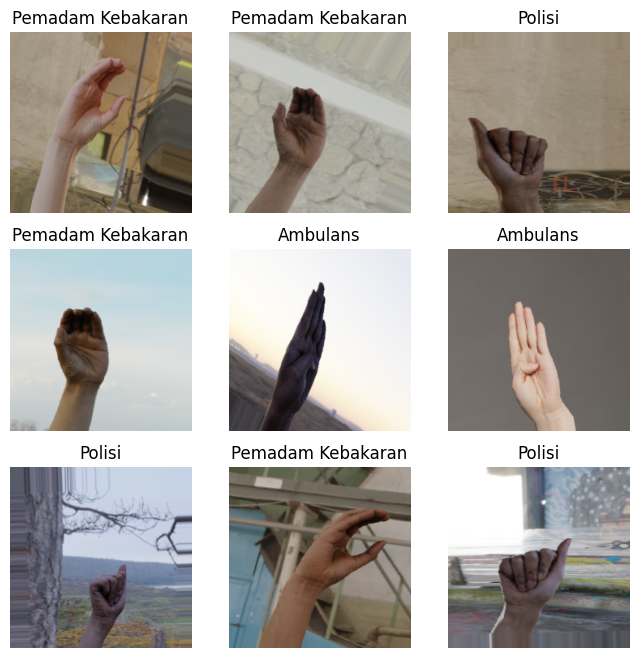

In [23]:
# Modify your labels_map to include all the classes that your model is predicting
labels_map = {
    0: "Ambulans", 1: "Pemadam Kebakaran", 2: "Polisi"
}

# Visualize some sample images
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

for i in range(1, cols * rows + 1):
    img, label = next(train_generator)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map.get(int(label[0]), f"Class {label[0]}"))
    plt.axis("off")
    plt.imshow(img[0])

plt.show()


In [62]:
# model = tf.keras.models.load_model('saved_models/ASL_model_V')

In [63]:
# predictions = model.predict(test_generator)
# predicted_classes = np.argmax(predictions, axis=1)

# # Print some predicted classes
# print(predicted_classes[:10])

82/82 [==============================] - 18s 224ms/step
[0 0 0 0 0 0 0 0 0 0]


In [24]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [25]:
# Train the model
epochs = 30
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Epoch 1/30
66/66 [==============================] - 348s 5s/step - loss: 1.1490 - accuracy: 0.3272 - val_loss: 1.0985 - val_accuracy: 0.3333
Epoch 2/30
66/66 [==============================] - 339s 5s/step - loss: 0.9598 - accuracy: 0.5204 - val_loss: 0.6977 - val_accuracy: 0.7357
Epoch 3/30
66/66 [==============================] - 341s 5s/step - loss: 0.5766 - accuracy: 0.7868 - val_loss: 0.4729 - val_accuracy: 0.8266
Epoch 4/30
66/66 [==============================] - 334s 5s/step - loss: 0.4053 - accuracy: 0.8533 - val_loss: 0.3405 - val_accuracy: 0.8923
Epoch 5/30
66/66 [==============================] - 321s 5s/step - loss: 0.3269 - accuracy: 0.8837 - val_loss: 0.2337 - val_accuracy: 0.9242
Epoch 6/30
66/66 [==============================] - 320s 5s/step - loss: 0.2488 - accuracy: 0.9217 - val_loss: 0.2235 - val_accuracy: 0.9310
Epoch 7/30
66/66 [==============================] - 318s 5s/step - loss: 0.1703 - accuracy: 0.9397 - val_loss: 0.1942 - val_accuracy: 0.9394
Epoch 8/30
66

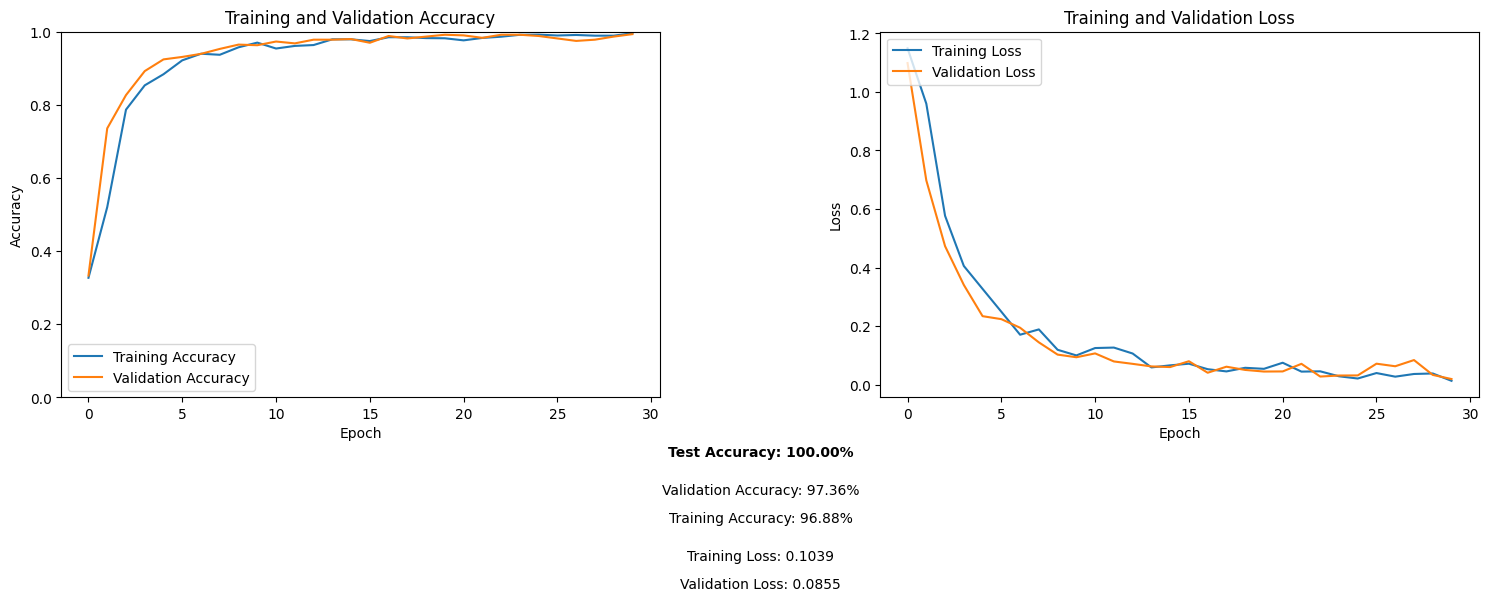

In [36]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss at each epoch
plt.figure(figsize=(15, 7))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Add test accuracy text
plt.text(-0.2, -0.15, f'Test Accuracy: {test_accuracy*100:.2f}%', ha='center', va='center', transform=plt.gca().transAxes, weight='bold')
plt.text(-0.2, -0.255, 'Validation Accuracy: 97.36%', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(-0.2, -0.33, 'Training Accuracy: 96.88%', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(-0.2, -0.435, 'Training Loss: 0.1039', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(-0.2, -0.51, 'Validation Loss: 0.0855', ha='center', va='center', transform=plt.gca().transAxes)


plt.tight_layout()
plt.show()

In [28]:
model.save('saved_models/ASL_model_E')

INFO:tensorflow:Assets written to: saved_models/ASL_model_E\assets


INFO:tensorflow:Assets written to: saved_models/ASL_model_E\assets


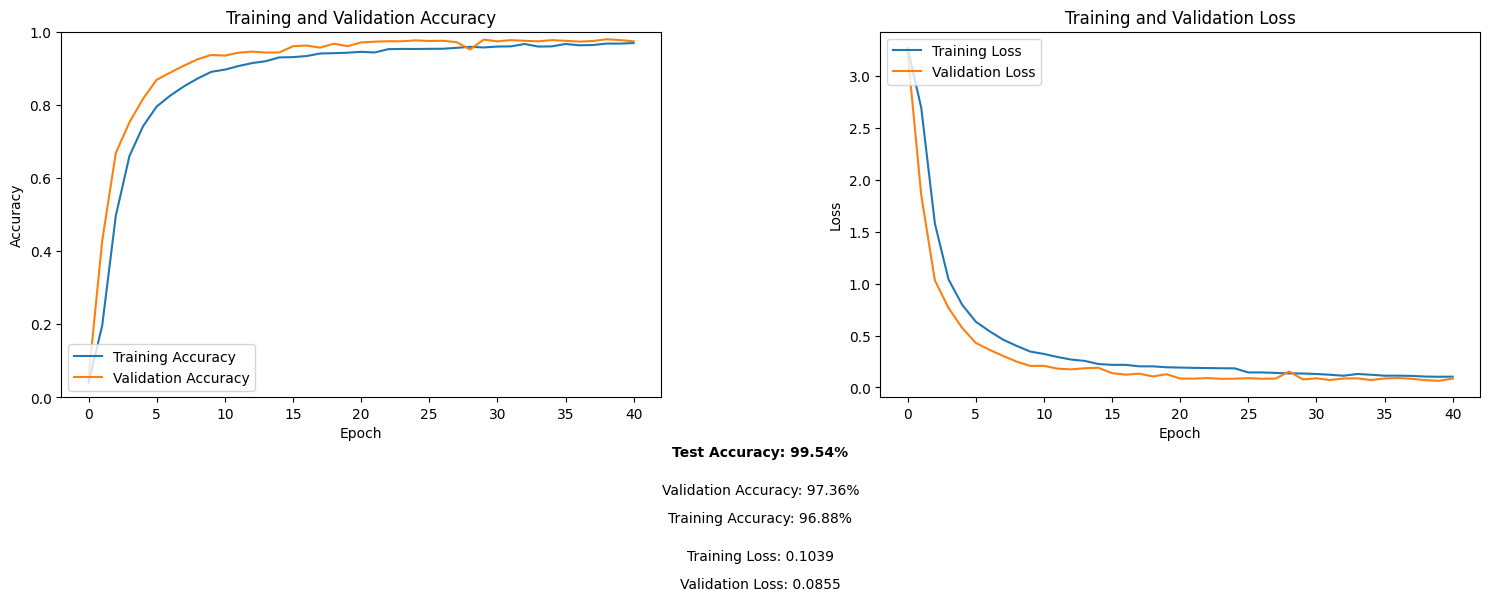

In [79]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss at each epoch
plt.figure(figsize=(15, 7))

training_accuracy = [
    0.0402, 0.1958, 0.4963, 0.6598, 0.7415, 0.7954, 0.8254, 0.8505, 
    0.8719, 0.8902, 0.8962, 0.9060, 0.9141, 0.9193, 0.9297, 0.9304, 
    0.9334, 0.9404, 0.9412, 0.9425, 0.9449, 0.9432, 
    0.9522, 0.9529, 0.9527, 0.9531, 0.9533, 0.9558, 0.9586, 0.9569, 0.9593, 0.9598, 0.9664, 0.9593, 0.9598, 0.9664, 0.9628, 0.9635, 0.9674, 0.9674, 0.9688]

validation_accuracy = [0.0526, 0.4274, 0.6680, 0.7521, 0.8166, 0.8685, 0.8883, 0.9071, 0.9244, 0.9365, 0.9345, 0.9425, 0.9454, 0.9429, 0.9433, 0.9602, 0.9621, 0.9563, 0.9672, 0.9604, 0.9705, 0.9727, 0.9738, 0.9738, 0.9762, 0.9745, 0.9751, 0.9714, 0.9514, 0.9784, 0.9736, 0.9769, 0.9751, 0.9736, 0.9769, 0.9751, 0.9728, 0.9744, 0.9792, 0.9771, 0.9736]

training_loss = [3.2689, 2.6966, 1.5810, 1.0418, 0.7976, 0.6338, 0.5425, 0.4609, 0.4004, 0.3455, 0.3226, 0.2932, 0.2684, 0.2556, 0.2256, 0.2176, 0.2176, 0.2032, 0.2032, 0.1941, 0.1914, 0.1884, 0.1868, 0.1848, 0.1838, 0.1442, 0.1442, 0.1400, 0.1348, 0.1341, 0.1294, 0.1221, 0.1127, 0.1294, 0.1221, 0.1127, 0.1134, 0.1109, 0.1045, 0.1028, 0.1039]
validation_loss = [
    3.2338, 1.8539, 1.0324, 0.7666, 0.5741, 0.4293, 0.3629, 0.3040, 
    0.2486, 0.2072, 0.2079, 0.1812, 0.1737, 0.1850, 0.1893, 0.1376, 
    0.1230, 0.1323, 0.1059, 0.1273, 0.0858, 0.0846, 0.0901, 0.0829,0.0842, 0.0892, 0.0837, 0.0847, 0.1533, 0.0770, 
    0.0875, 0.0709, 0.0860, 0.0875, 0.0709, 0.0860, 0.0909, 0.0829, 0.0696, 0.0635, 0.0855
]

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

# Add test accuracy text
plt.text(-0.2, -0.15, f'Test Accuracy: {test_accuracy*100:.2f}%', ha='center', va='center', transform=plt.gca().transAxes, weight='bold')
plt.text(-0.2, -0.255, 'Validation Accuracy: 97.36%', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(-0.2, -0.33, 'Training Accuracy: 96.88%', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(-0.2, -0.435, 'Training Loss: 0.1039', ha='center', va='center', transform=plt.gca().transAxes)
plt.text(-0.2, -0.51, 'Validation Loss: 0.0855', ha='center', va='center', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

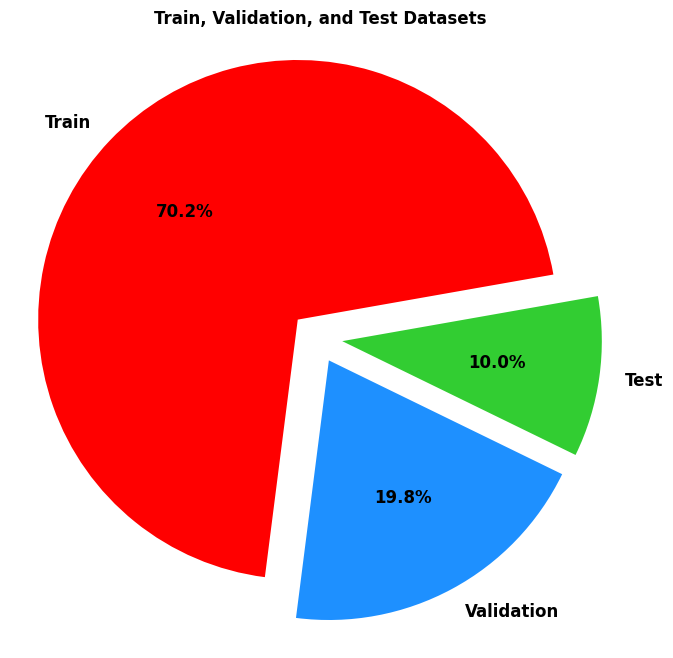

In [31]:
import matplotlib.pyplot as plt

# Get the number of samples in each set
train_samples = len(train_generator.filenames)
validation_samples = len(validation_generator.filenames)
test_samples = len(test_generator.filenames)

# Create a list of sizes for the pie chart
sizes = [train_samples, validation_samples, test_samples]

# Create labels for each slice
labels = ['Train', 'Validation', 'Test']

font_props = {'weight': 'bold', 'size': 12}

# Create the pie chart
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0.1)  # This will 'explode' the 1st, 2nd, and 3rd slice
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=10, explode=explode, colors=['#FF0000','#1E90FF','#32CD32'], textprops=font_props)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Train, Validation, and Test Datasets', font_props)

# Display the pie chart
plt.show()


In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

precision = precision_score(true_labels, predicted_classes, average='weighted')
recall = recall_score(true_labels, predicted_classes, average='weighted')
accuracy = accuracy_score(true_labels, predicted_classes)

true_labels = test_generator.classes

f1 = f1_score(true_labels, predicted_classes, average='weighted')

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")


10/10 [==============================] - 2s 167ms/step
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0
